In [92]:
import numpy as np
import pandas as pd

from sklearn.linear_model import ( LogisticRegression, LinearRegression )
from sklearn.preprocessing import ( StandardScaler )
from sklearn.decomposition import ( PCA )
from sklearn.cluster import ( KMeans )

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
df_purchase = pd.read_csv('dataset/purchase_data.csv')

In [ ]:
pca = pickle.load(open('data/pca.pickle', 'rb'))
scaler = pickle.load(open('data/scaler.pickle', 'rb'))
kmeans_pca = pickle.load(open('data/kmeans_pca.pickle', 'rb'))

In [ ]:
features = df_purchase[ ['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size'] ]
df_purchase_segm_std = scaler.transform(features)

In [ ]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [ ]:
df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [ ]:
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix='Segment', prefix_sep='_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis=1)

In [ ]:
df_pa = df_purchase_predictors

### Purchase Probability Model

In [ ]:
Y = df_pa['Incidence']

In [ ]:
X = pd.DataFrame()
X['Mean Price'] = (
    df_pa['Price_1'] +
    df_pa['Price_2'] +
    df_pa['Price_3'] +
    df_pa['Price_4'] +
    df_pa['Price_5']
) / 5

In [ ]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X, Y)

In [ ]:
model_purchase.coef_

#### Price Elasticity of Purchase Probability

In [ ]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

In [ ]:
price_range = np.arange(0.5, 3.5, 0.01)

In [ ]:
price_range

In [ ]:
df_price_range = pd.DataFrame(price_range)

In [ ]:
Y_prob = model_purchase.predict_proba(df_price_range)

In [ ]:
Y_prob

In [ ]:
purchase_pr = Y_prob[:][:, 1]

In [ ]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [ ]:
df_price_elasticities = pd.DataFrame(price_range)

In [ ]:
df_price_elasticities = df_price_elasticities.rename(columns={"0": "Price_Point"})
df_price_elasticities['Mean_PE'] = pe

In [ ]:
df_price_elasticities

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability by Segments

#### Segment 1 - Career Focused

In [ ]:
df_pa_segm_1 = df_pa[df_pa['Segment'] == 1]

In [ ]:
Y = df_pa_segm_1['Incidence']

In [ ]:
X = pd.DataFrame(
    df_pa_segm_1['Price_1'] + 
    df_pa_segm_1['Price_2'] + 
    df_pa_segm_1['Price_3'] + 
    df_pa_segm_1['Price_4'] + 
    df_pa_segm_1['Price_5']
) / 5

In [ ]:
model_incidence_segment_1 = LogisticRegression(solver='sag')
model_incidence_segment_1.fit(X, Y)

In [ ]:
model_incidence_segment_1.coef_

In [ ]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

In [ ]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.plot(price_range, pe_segment_1, color='green')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

#### Segment 2 - Fewer Opportunities

In [ ]:
df_pa_segm_2 = df_pa[df_pa['Segment'] == 2]

In [ ]:
Y = df_pa_segm_2['Incidence']

X = pd.DataFrame()

X['Mean_Price'] = (
    df_pa_segm_2['Price_1'] +
    df_pa_segm_2['Price_2'] +
    df_pa_segm_2['Price_3'] +
    df_pa_segm_2['Price_4'] +
    df_pa_segm_2['Price_5']
) / 5

model_incidence_segment_2 = LogisticRegression(solver='sag')
model_incidence_segment_2.fit(X, Y)

model_incidence_segment_2.coef_
Y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:, 1]
pe_segment_2 = model_incidence_segment_2.coef_[:, 0] * price_range * (1 - purchase_pr_segment_2)

In [ ]:
df_price_elasticities['PE_Segment_2'] = pe_segment_2
df_price_elasticities

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, pe, color='grey')
plt.plot(price_range, pe_segment_1, color='green')
plt.plot(price_range, pe_segment_2, color='r')
plt.xlabel('Price')
plt.xlabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability with Promotion Feature

#### Data preparation

In [ ]:
Y = df_pa['Incidence']

In [ ]:
X = pd.DataFrame()
X['Mean_Price'] = (
    df_pa['Price_1'] +
    df_pa['Price_2'] +
    df_pa['Price_3'] +
    df_pa['Price_4'] +
    df_pa['Price_5']
) / 5

In [ ]:
X['Mean_Promotion'] = (
    df_pa['Promotion_1'] +
    df_pa['Promotion_2'] +
    df_pa['Promotion_3'] +
    df_pa['Promotion_4'] +
    df_pa['Promotion_5']
) / 5

In [ ]:
X

#### Model Estimation

In [ ]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

#### Price Elasticity with Promotion

In [ ]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns={0:"Price_Range"})

In [ ]:
df_price_elasticity_promotion['Promotion'] = 1

In [ ]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [ ]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [ ]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

### Brand Choice

#### Data Preparation

In [45]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [46]:
brand_choice.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,False,False,False,True
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,False,False,False,True
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,False,False,False,True


In [47]:
Y = brand_choice['Brand']

In [48]:
brand_choice.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3'],
      dtype='object')

In [49]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [50]:
model_brand_choice = LogisticRegression(solver='sag', multi_class='multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [51]:
model_brand_choice.coef_

array([[-3.9159387 ,  0.65846944,  2.41780573,  0.70409856, -0.20208284],
       [ 1.27461759, -1.87985206, -0.21262823, -0.20633598,  0.58787596],
       [ 1.6241532 ,  0.56208871,  0.50074589,  1.03947909,  0.45274356],
       [ 0.57454282,  0.39559218, -1.40058904, -1.24623862,  0.24935715],
       [ 0.44262509,  0.26370173, -1.30533435, -0.29100304, -1.08789383]])

In [52]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915939,0.658469,2.417806,0.704099,-0.202083
1,1.274618,-1.879852,-0.212628,-0.206336,0.587876
2,1.624153,0.562089,0.500746,1.039479,0.452744
3,0.574543,0.395592,-1.400589,-1.246239,0.249357
4,0.442625,0.263702,-1.305334,-0.291003,-1.087894


In [53]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Prices_1', 'Prices_2', 'Prices_3', 'Prices_4', 'Prices_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Prices_1,-3.92,1.27,1.62,0.57,0.44
Prices_2,0.66,-1.88,0.56,0.40,0.26
Prices_3,2.42,-0.21,0.50,-1.40,-1.31
Prices_4,0.70,-0.21,1.04,-1.25,-0.29
Prices_5,-0.20,0.59,0.45,0.25,-1.09


#### Own Brand Elasticity Brand 5

In [54]:
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [55]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [56]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [57]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [58]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [59]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5

In [60]:
df_price_elasticities

,0,Mean_PE,PE_Segment_1,PE_Segment_2,Brand_5
0,0.50,-0.096608,-0.119111,-0.167958,-0.049055
1,0.51,-0.100687,-0.123295,-0.172880,-0.050616
2,0.52,-0.104893,-0.127572,-0.177872,-0.052206
3,0.53,-0.109230,-0.131944,-0.182935,-0.053826
4,0.54,-0.113700,-0.136413,-0.188070,-0.055477
...,...,...,...,...,...
295,3.45,-8.021481,-5.681470,-4.020772,-3.231572
296,3.46,-8.046743,-5.701628,-4.035637,-3.247765
297,3.47,-8.071971,-5.721748,-4.050486,-3.263927
298,3.48,-8.097166,-5.741832,-4.065319,-3.280057


Cross Price Elasticity Brand 5, Cross Brand 4

In [61]:
df_brand5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [63]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [64]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [65]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [66]:
beta5

-1.09

In [67]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [69]:
df_price_elasticities['Brand_5_cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,0,Mean_PE,PE_Segment_1,PE_Segment_2,Brand_5,Brand_5_cross_Brand_4
0,0.50,-0.096608,-0.119111,-0.167958,-0.049055,0.332011
1,0.51,-0.100687,-0.123295,-0.172880,-0.050616,0.337287
2,0.52,-0.104893,-0.127572,-0.177872,-0.052206,0.342507
3,0.53,-0.109230,-0.131944,-0.182935,-0.053826,0.347668
4,0.54,-0.113700,-0.136413,-0.188070,-0.055477,0.352773
...,...,...,...,...,...,...
295,3.45,-8.021481,-5.681470,-4.020772,-3.231572,0.162236
296,3.46,-8.046743,-5.701628,-4.035637,-3.247765,0.160336
297,3.47,-8.071971,-5.721748,-4.050486,-3.263927,0.158450
298,3.48,-8.097166,-5.741832,-4.065319,-3.280057,0.156578


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

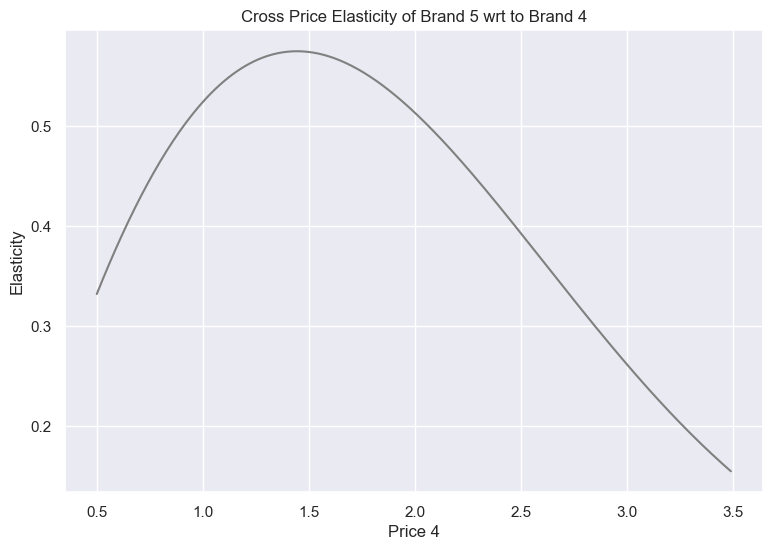

In [70]:
plt.figure(figsize=(9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color='grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

#### Own and Cross Price Elasticity by Segment

##### Well Off

In [76]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,False,False,False,True
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,False,False,False,True
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,3,False,False,False,True
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,3,False,False,False,True
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,3,False,False,False,True
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,3,False,False,False,True


In [77]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Prices_1,-3.95,1.63,1.12,0.21,0.99
Prices_2,0.66,-2.13,0.07,0.25,1.15
Prices_3,1.25,0.05,1.19,-0.31,-2.19
Prices_4,1.31,-0.31,1.59,-1.58,-1.01
Prices_5,0.93,1.28,0.19,0.52,-2.93


#### Own Brand Price Elasticity

In [80]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

#### Cross Brand Price Elasticity

In [78]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,0,Mean_PE,PE_Segment_1,PE_Segment_2,Brand_5,Brand_5_cross_Brand_4,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096608,-0.119111,-0.167958,-0.049055,0.332011,0.181596
1,0.51,-0.100687,-0.123295,-0.172880,-0.050616,0.337287,0.183893
2,0.52,-0.104893,-0.127572,-0.177872,-0.052206,0.342507,0.186141
3,0.53,-0.109230,-0.131944,-0.182935,-0.053826,0.347668,0.188341
4,0.54,-0.113700,-0.136413,-0.188070,-0.055477,0.352773,0.190492
5,0.55,-0.118308,-0.140979,-0.193276,-0.057158,0.357820,0.192594
6,0.56,-0.123056,-0.145644,-0.198554,-0.058870,0.362809,0.194649
7,0.57,-0.127947,-0.150410,-0.203905,-0.060614,0.367741,0.196656
8,0.58,-0.132986,-0.155279,-0.209329,-0.062390,0.372614,0.198616
9,0.59,-0.138176,-0.160251,-0.214827,-0.064199,0.377430,0.200529


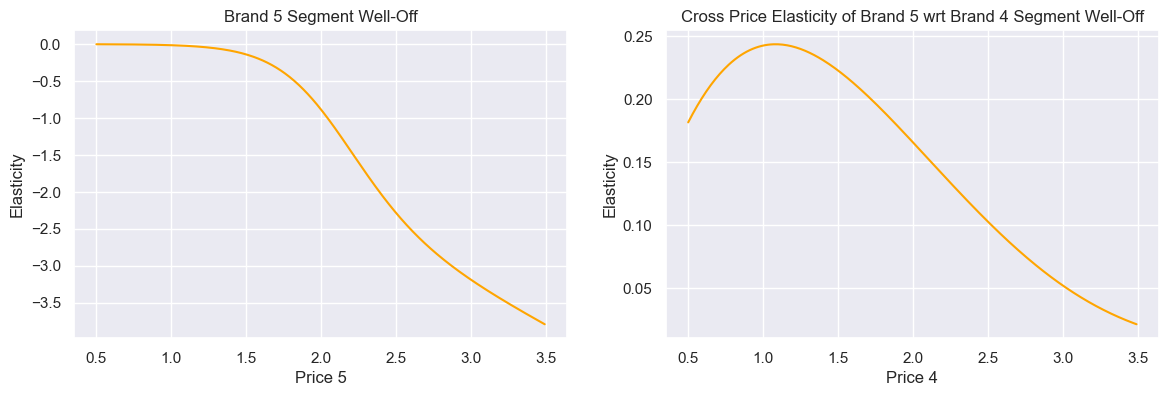

In [81]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

#### Price Elasticity of Purchase Quantity

In [83]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,3,False,False,False,True
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,3,False,False,False,True
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,3,False,False,False,True
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,3,False,False,False,True


In [84]:
df_purchase_quantity = pd.get_dummies(
    df_purchase_quantity,
    columns=["Brand"],
    prefix="Brand",
    prefix_sep="_"
)
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.644077
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.080476
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,1.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,2.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,3.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000


In [85]:
df_purchase_quantity.columns

Index(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4',
       'Brand_5'],
      dtype='object')

In [86]:
df_purchase_quantity['Price_Incidence'] = (
    df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
    df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
    df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
    df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
    df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5']
)

In [87]:
df_purchase_quantity['Promotion_Incidence'] = (
    df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
    df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
    df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
    df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
    df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5']
)

#### Model Estimation. Linear Regression

In [90]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
X.head()

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0


In [91]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [93]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [94]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

#### Price Elasticity Estimation

In [95]:
df_price_elasticity_quantity = pd.DataFrame(index=np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [97]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685045

In [98]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [100]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [102]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities.head()

,0,Mean_PE,PE_Segment_1,PE_Segment_2,Brand_5,Brand_5_cross_Brand_4,Brand_5_Cross_Brand_4_S3,Brand 5 S3,PE_Quantity_Promotion_1
0,0.50,-0.096608,-0.119111,-0.167958,-0.049055,0.332011,0.181596,-0.001036,-0.102157
1,0.51,-0.100687,-0.123295,-0.172880,-0.050616,0.337287,0.183893,-0.001098,-0.104413
2,0.52,-0.104893,-0.127572,-0.177872,-0.052206,0.342507,0.186141,-0.001163,-0.106679
3,0.53,-0.109230,-0.131944,-0.182935,-0.053826,0.347668,0.188341,-0.001231,-0.108954
4,0.54,-0.113700,-0.136413,-0.188070,-0.055477,0.352773,0.190492,-0.001303,-0.111238


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

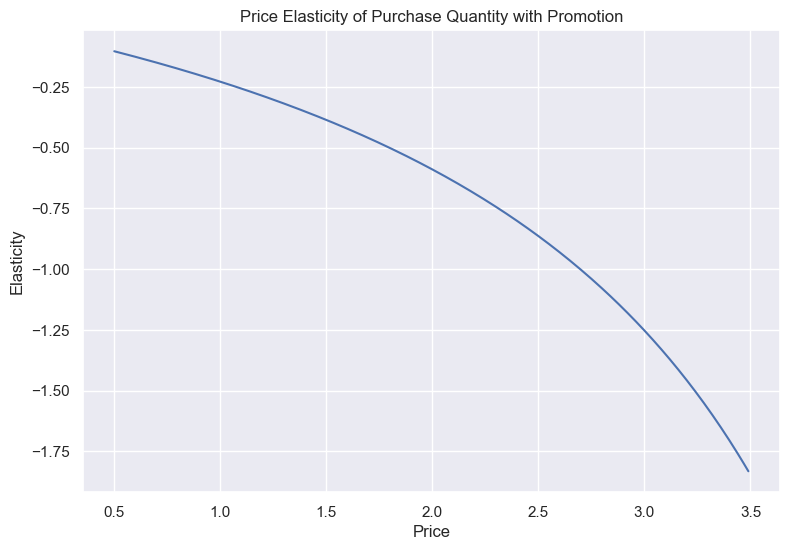

In [103]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [104]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities.head()

,0,Mean_PE,PE_Segment_1,PE_Segment_2,Brand_5,Brand_5_cross_Brand_4,Brand_5_Cross_Brand_4_S3,Brand 5 S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096608,-0.119111,-0.167958,-0.049055,0.332011,0.181596,-0.001036,-0.102157,-0.099543
1,0.51,-0.100687,-0.123295,-0.172880,-0.050616,0.337287,0.183893,-0.001098,-0.104413,-0.101736
2,0.52,-0.104893,-0.127572,-0.177872,-0.052206,0.342507,0.186141,-0.001163,-0.106679,-0.103939
3,0.53,-0.109230,-0.131944,-0.182935,-0.053826,0.347668,0.188341,-0.001231,-0.108954,-0.106150
4,0.54,-0.113700,-0.136413,-0.188070,-0.055477,0.352773,0.190492,-0.001303,-0.111238,-0.108369


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

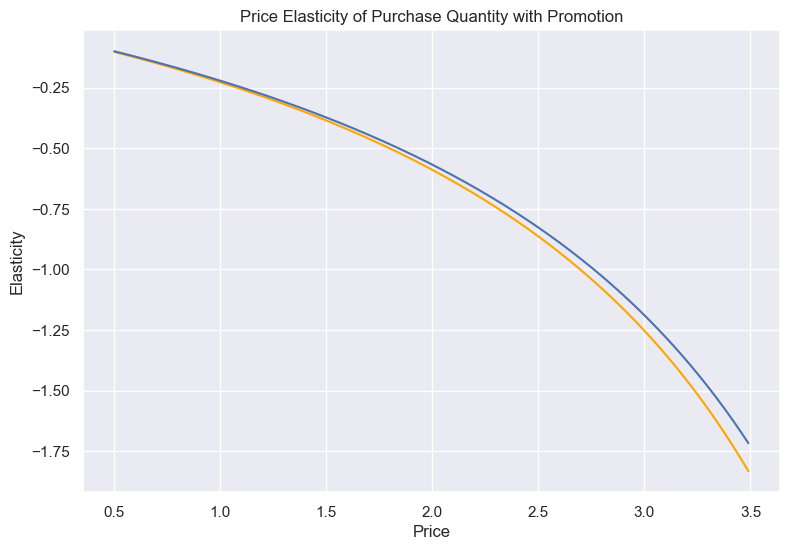

In [105]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color='orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')